## Pandas
Pandas est une bibliothèque Python puissante et flexible pour la manipulation et l'analyse de données. Elle est particulièrement utile pour travailler avec des données tabulaires (comme des feuilles de calcul) et des séries temporelles.

**Pourquoi utiliser Pandas ?**
* **Manipulation de Données :** Pandas offre des structures de données robustes (DataFrame et Series) pour manipuler des données tabulaires.
* **Nettoyage de Données :** Il permet de gérer facilement les valeurs manquantes et d'effectuer des opérations de nettoyage.
* **Analyse Exploratoire :** Pandas facilite l'exploration des données grâce à des fonctions de groupement, de pivotement, et d'agrégation.
* **Intégration avec d'autres Bibliothèques :** Pandas s'intègre bien avec NumPy, Matplotlib, et d'autres bibliothèques de data science en Python.

## 1. Structures de Données de Pandas
**Series :**
Une Series est une structure de données unidimensionnelle similaire à une colonne dans une table. Elle peut contenir des données de n'importe quel type (entiers, chaînes de caractères, flottants, etc.).

In [1]:
# installation du package pandas
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

# Création d'une Series
s = pd.Series([1, 3, 5, 7, 9])
print(s)


0    1
1    3
2    5
3    7
4    9
dtype: int64


**DataFrame :**
Un DataFrame est une structure de données bidimensionnelle (comme une feuille de calcul) avec des colonnes de types de données potentiellement différents.

In [3]:
# Création d'un DataFrame à partir d'un dictionnaire
data = {
    'Nom': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack'],
    'Age': [25, 32, 35, np.nan, 28, np.nan, 40, 22, np.nan, 30],
    'Ville': ['Paris', 'Lyon', 'Marseille', np.nan, 'Toulouse', 'Nice', np.nan, 'Nantes', 'Strasbourg', 'Bordeaux'],
    'Salaire': [50000, 54000, np.nan, 58000, 62000, 48000, np.nan, 55000, 51000, np.nan],
    'Années d\'expérience': [3, 8, 10, 12, np.nan, 5, 15, 1, np.nan, 7],
    'Date': ['2024-08-01', '2024-07-02', '2024-08-03', '2024-06-04', np.nan, '2024-08-06', np.nan, '2024-08-08', '2024-08-09', np.nan]
}

df = pd.DataFrame(data)

df.to_csv('data/exo_pandas.csv', index=False)

print(df)

       Nom   Age       Ville  Salaire  Années d'expérience        Date
0    Alice  25.0       Paris  50000.0                  3.0  2024-08-01
1      Bob  32.0        Lyon  54000.0                  8.0  2024-07-02
2  Charlie  35.0   Marseille      NaN                 10.0  2024-08-03
3    David   NaN         NaN  58000.0                 12.0  2024-06-04
4      Eve  28.0    Toulouse  62000.0                  NaN         NaN
5    Frank   NaN        Nice  48000.0                  5.0  2024-08-06
6    Grace  40.0         NaN      NaN                 15.0         NaN
7   Hannah  22.0      Nantes  55000.0                  1.0  2024-08-08
8      Ivy   NaN  Strasbourg  51000.0                  NaN  2024-08-09
9     Jack  30.0    Bordeaux      NaN                  7.0         NaN


**Indexation et Slicing :**
Vous pouvez accéder aux données dans une Series ou un DataFrame de manière similaire à NumPy, avec des opérations d'indexation et de slicing.

In [4]:
# Accès à une colonne (Series)
ages = df['Age']
print(ages)

0    25.0
1    32.0
2    35.0
3     NaN
4    28.0
5     NaN
6    40.0
7    22.0
8     NaN
9    30.0
Name: Age, dtype: float64


In [5]:
# Accès à une ligne par son index
row = df.iloc[2]  # Accès à la troisième ligne
print(row)

Nom                       Charlie
Age                          35.0
Ville                   Marseille
Salaire                       NaN
Années d'expérience          10.0
Date                   2024-08-03
Name: 2, dtype: object


In [6]:
# Slicing d'un DataFrame
subset = df.loc[1:3, ['Nom', 'Ville']]  # Sous-ensemble du DataFrame
print(subset)

       Nom      Ville
1      Bob       Lyon
2  Charlie  Marseille
3    David        NaN


## 2. Manipulation de Données avec Pandas
**Chargement et Sauvegarde de Données :**
Pandas permet de lire et de sauvegarder des données à partir de différents formats tels que CSV, Excel, SQL, et JSON.

In [7]:
# Lecture de données à partir d'un fichier CSV
df = pd.read_csv('data/exo_pandas.csv')

# Sauvegarde d'un DataFrame dans un fichier Excel
df.to_excel('data/output.xlsx', index=False)


**Gestion des Valeurs Manquantes :**
Les données réelles sont souvent incomplètes, et Pandas propose des outils pour identifier et traiter les valeurs manquantes.

In [8]:
# Conversion du dictionnaire en DataFrame
df = pd.DataFrame(data)

# Identification des valeurs manquantes
missing_data = df.isnull().sum()
print(missing_data)

Nom                    0
Age                    3
Ville                  2
Salaire                3
Années d'expérience    2
Date                   3
dtype: int64


In [9]:
# Remplissage des valeurs manquantes avec une valeur spécifique
df_filled = df.fillna({
    'Nom': 'Inconnu',       # Remplace les NaN dans la colonne 'Nom' par 'Inconnu'
    'Age': 0,               # Remplace les NaN dans la colonne 'Âge' par 0
    'Ville': 'Inconnue',    # Remplace les NaN dans la colonne 'Ville' par 'Inconnue'
    'Date': '0/0/0'         # Remplace les NaN dans la colonne 'Date' par '0/0/0'
})

# Affichage du DataFrame après remplissage
print(df_filled)

       Nom   Age       Ville  Salaire  Années d'expérience        Date
0    Alice  25.0       Paris  50000.0                  3.0  2024-08-01
1      Bob  32.0        Lyon  54000.0                  8.0  2024-07-02
2  Charlie  35.0   Marseille      NaN                 10.0  2024-08-03
3    David   0.0    Inconnue  58000.0                 12.0  2024-06-04
4      Eve  28.0    Toulouse  62000.0                  NaN       0/0/0
5    Frank   0.0        Nice  48000.0                  5.0  2024-08-06
6    Grace  40.0    Inconnue      NaN                 15.0       0/0/0
7   Hannah  22.0      Nantes  55000.0                  1.0  2024-08-08
8      Ivy   0.0  Strasbourg  51000.0                  NaN  2024-08-09
9     Jack  30.0    Bordeaux      NaN                  7.0       0/0/0


In [10]:
# Suppression des lignes contenant des valeurs manquantes
df_dropped = df.dropna()

# Affichage du DataFrame après suppression
print(df_dropped)

      Nom   Age   Ville  Salaire  Années d'expérience        Date
0   Alice  25.0   Paris  50000.0                  3.0  2024-08-01
1     Bob  32.0    Lyon  54000.0                  8.0  2024-07-02
7  Hannah  22.0  Nantes  55000.0                  1.0  2024-08-08


**Filtrage et Sélection de Données :**
Vous pouvez filtrer les données en fonction de conditions spécifiques.

In [11]:
# Filtrage des données : sélectionner les lignes où l'âge est supérieur à 25
filtered_df = df[df['Age'] > 25]
print(filtered_df)

       Nom   Age      Ville  Salaire  Années d'expérience        Date
1      Bob  32.0       Lyon  54000.0                  8.0  2024-07-02
2  Charlie  35.0  Marseille      NaN                 10.0  2024-08-03
4      Eve  28.0   Toulouse  62000.0                  NaN         NaN
6    Grace  40.0        NaN      NaN                 15.0         NaN
9     Jack  30.0   Bordeaux      NaN                  7.0         NaN


In [12]:
# Sélection des colonnes spécifiques
selected_columns = df[['Nom', 'Ville']]
print(selected_columns)

       Nom       Ville
0    Alice       Paris
1      Bob        Lyon
2  Charlie   Marseille
3    David         NaN
4      Eve    Toulouse
5    Frank        Nice
6    Grace         NaN
7   Hannah      Nantes
8      Ivy  Strasbourg
9     Jack    Bordeaux


**Groupement et Agrégation :**
Le groupement et l'agrégation sont essentiels pour l'analyse des données, permettant de résumer des données par groupes.

In [13]:
# Groupement par ville et calcul de l'âge moyen dans chaque ville
grouped = df.groupby('Ville')['Age'].mean()
print(grouped)

Ville
Bordeaux      30.0
Lyon          32.0
Marseille     35.0
Nantes        22.0
Nice           NaN
Paris         25.0
Strasbourg     NaN
Toulouse      28.0
Name: Age, dtype: float64


In [14]:
# Agrégation avec plusieurs fonctions
aggregated = df.groupby('Ville').agg({'Age': ['mean', 'min', 'max']})
print(aggregated)

             Age            
            mean   min   max
Ville                       
Bordeaux    30.0  30.0  30.0
Lyon        32.0  32.0  32.0
Marseille   35.0  35.0  35.0
Nantes      22.0  22.0  22.0
Nice         NaN   NaN   NaN
Paris       25.0  25.0  25.0
Strasbourg   NaN   NaN   NaN
Toulouse    28.0  28.0  28.0


**Fusion et Jointure de Données :**
Pandas permet de fusionner plusieurs DataFrames en fonction d'une clé commune, similaire aux opérations de jointure en SQL.

In [15]:
# Création de deux DataFrames pour la jointure
df1 = pd.DataFrame({
    'Fruits': ['Ananas', 'Orange', 'Mangue'],
    'Quantité': [24, 27, 22]
})
print(df1)


   Fruits  Quantité
0  Ananas        24
1  Orange        27
2  Mangue        22


In [16]:
df2 = pd.DataFrame({
    'Fruits': ['Ananas', 'Orange', 'Mangue'],
    'Origine': ['New York', 'Los Angeles', 'Houston']
})
print(df2)

   Fruits      Origine
0  Ananas     New York
1  Orange  Los Angeles
2  Mangue      Houston


In [17]:
# Jointure des DataFrames sur la colonne 'Name'
merged_df = pd.merge(df1, df2, on='Fruits', how='inner')
print(merged_df)

   Fruits  Quantité      Origine
0  Ananas        24     New York
1  Orange        27  Los Angeles
2  Mangue        22      Houston


## 3. Analyse Exploratoire des Données (EDA)
**Analyse Statistique de Base :**
Pandas propose des méthodes pour obtenir des statistiques descriptives rapidement.

In [18]:
# Résumé statistique du DataFrame
summary = df.describe()
print(summary)

             Age      Salaire  Années d'expérience
count   7.000000      7.00000             8.000000
mean   30.285714  54000.00000             7.625000
std     6.074929   4864.83984             4.657943
min    22.000000  48000.00000             1.000000
25%    26.500000  50500.00000             4.500000
50%    30.000000  54000.00000             7.500000
75%    33.500000  56500.00000            10.500000
max    40.000000  62000.00000            15.000000


In [19]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Calcul de la corrélation entre colonnes numériques
correlation = df_numeric.corr()
print(correlation)

                          Age   Salaire  Années d'expérience
Age                  1.000000  0.191487             0.996257
Salaire              0.191487  1.000000             0.520309
Années d'expérience  0.996257  0.520309             1.000000


**Manipulation des Dates et Séries Temporelles :**
Pandas dispose d'outils robustes pour travailler avec des données temporelles, y compris la conversion de chaînes en objets datetime, la gestion des fréquences et des décalages.

In [20]:
# Conversion de la colonne 'Date' en format datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extraction de l'année et du mois
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
print("DataFrame après conversion et extraction :")
print(df)

DataFrame après conversion et extraction :
       Nom   Age       Ville  Salaire  Années d'expérience       Date    Year  \
0    Alice  25.0       Paris  50000.0                  3.0 2024-08-01  2024.0   
1      Bob  32.0        Lyon  54000.0                  8.0 2024-07-02  2024.0   
2  Charlie  35.0   Marseille      NaN                 10.0 2024-08-03  2024.0   
3    David   NaN         NaN  58000.0                 12.0 2024-06-04  2024.0   
4      Eve  28.0    Toulouse  62000.0                  NaN        NaT     NaN   
5    Frank   NaN        Nice  48000.0                  5.0 2024-08-06  2024.0   
6    Grace  40.0         NaN      NaN                 15.0        NaT     NaN   
7   Hannah  22.0      Nantes  55000.0                  1.0 2024-08-08  2024.0   
8      Ivy   NaN  Strasbourg  51000.0                  NaN 2024-08-09  2024.0   
9     Jack  30.0    Bordeaux      NaN                  7.0        NaT     NaN   

   Month  
0    8.0  
1    7.0  
2    8.0  
3    6.0  
4    NaN  

In [21]:
# Définir la colonne 'Date' comme index
df.set_index('Date', inplace=True)

# Sélectionner uniquement les colonnes numériques pour l'opération de resampling
df_numeric = df[['Year', 'Month']]

# Resampling des données mensuellement
monthly_data = df_numeric.resample('M').mean()

print("\nDonnées resamplées mensuellement :")
print(monthly_data)


Données resamplées mensuellement :
              Year  Month
Date                     
2024-06-30  2024.0    6.0
2024-07-31  2024.0    7.0
2024-08-31  2024.0    8.0


## 4. Applications Avancées en Science des Données
**Manipulation de Grandes Bases de Données :**
Pandas est capable de traiter de grandes quantités de données, mais il peut être nécessaire d'optimiser l'utilisation de la mémoire et de la vitesse.

In [22]:
# Lecture d'un grand fichier CSV en spécifiant des types de données
#df_large = pd.read_csv('data/exo_pandas.csv', dtype={'column1': 'int32', 'column2': 'float32'})

# Utilisation de chunks pour traiter de gros fichiers en morceaux
#chunks = pd.read_csv('data/exo_pandas.csv', chunksize=10000)
#for chunk in chunks:
    # Traitement sur chaque chunk
    #process(chunk)


**Application de Fonctions et de Méthodes Personnalisées :**
Pandas permet d'appliquer des fonctions personnalisées à vos données grâce à apply et applymap.

In [23]:
# Fonction personnalisée pour convertir l'âge en catégories
def age_category(age):
    if age < 25:
        return 'Jeune'
    elif age < 35:
        return 'Adulte'
    else:
        return 'Senior'

# Application de la fonction à la colonne 'Age'
df['Age_Category'] = df['Age'].apply(age_category)
print(df)

                Nom   Age       Ville  Salaire  Années d'expérience    Year  \
Date                                                                          
2024-08-01    Alice  25.0       Paris  50000.0                  3.0  2024.0   
2024-07-02      Bob  32.0        Lyon  54000.0                  8.0  2024.0   
2024-08-03  Charlie  35.0   Marseille      NaN                 10.0  2024.0   
2024-06-04    David   NaN         NaN  58000.0                 12.0  2024.0   
NaT             Eve  28.0    Toulouse  62000.0                  NaN     NaN   
2024-08-06    Frank   NaN        Nice  48000.0                  5.0  2024.0   
NaT           Grace  40.0         NaN      NaN                 15.0     NaN   
2024-08-08   Hannah  22.0      Nantes  55000.0                  1.0  2024.0   
2024-08-09      Ivy   NaN  Strasbourg  51000.0                  NaN  2024.0   
NaT            Jack  30.0    Bordeaux      NaN                  7.0     NaN   

            Month Age_Category  
Date              

In [24]:
# Application de la fonction à toutes les valeurs du DataFrame
df_applied = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)
print(df_applied)

                Nom   Age       Ville  Salaire  Années d'expérience    Year  \
Date                                                                          
2024-08-01    ALICE  25.0       PARIS  50000.0                  3.0  2024.0   
2024-07-02      BOB  32.0        LYON  54000.0                  8.0  2024.0   
2024-08-03  CHARLIE  35.0   MARSEILLE      NaN                 10.0  2024.0   
2024-06-04    DAVID   NaN         NaN  58000.0                 12.0  2024.0   
NaT             EVE  28.0    TOULOUSE  62000.0                  NaN     NaN   
2024-08-06    FRANK   NaN        NICE  48000.0                  5.0  2024.0   
NaT           GRACE  40.0         NaN      NaN                 15.0     NaN   
2024-08-08   HANNAH  22.0      NANTES  55000.0                  1.0  2024.0   
2024-08-09      IVY   NaN  STRASBOURG  51000.0                  NaN  2024.0   
NaT            JACK  30.0    BORDEAUX      NaN                  7.0     NaN   

            Month Age_Category  
Date              

<ipython-input-24-0bf561338758>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_applied = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


**Traitement des Données Textuelles :**
Pandas permet de traiter et d'analyser des données textuelles avec des fonctions de string intégrées.

In [36]:
import pandas as pd

# Création d'un DataFrame avec des colonnes 'Text' et 'Email'
data = {
    'Text': [
        '  Bonjour   tout le  monde  ',
        'Je suis Doowensky SINTILUS ',
        '   Data scientist   ',
        'Je vous souhaite la bienvenue dans ma formation   ',
    ],
    'Email': [
        'doowenskysintilus@gmail.com',
        'bob.smith@yahoo.fr',
        'charlie.doe@domain.net',
        'david@example.com',
    ]
}

df = pd.DataFrame(data)

print(df)


                                                Text  \
0                         Bonjour   tout le  monde     
1                        Je suis Doowensky SINTILUS    
2                                  Data scientist      
3  Je vous souhaite la bienvenue dans ma formatio...   

                         Email  
0  doowenskysintilus@gmail.com  
1           bob.smith@yahoo.fr  
2       charlie.doe@domain.net  
3            david@example.com  


In [37]:
# Nettoyage de texte : suppression des espaces en trop
df['Text'] = df['Text'].str.strip()
print(df)

                                              Text  \
0                         Bonjour   tout le  monde   
1                       Je suis Doowensky SINTILUS   
2                                   Data scientist   
3  Je vous souhaite la bienvenue dans ma formation   

                         Email  
0  doowenskysintilus@gmail.com  
1           bob.smith@yahoo.fr  
2       charlie.doe@domain.net  
3            david@example.com  


In [38]:
# Extraction de parties spécifiques du texte (domaine des emails)
df['Domain'] = df['Email'].str.split('@').str[1]
print(df)

                                              Text  \
0                         Bonjour   tout le  monde   
1                       Je suis Doowensky SINTILUS   
2                                   Data scientist   
3  Je vous souhaite la bienvenue dans ma formation   

                         Email       Domain  
0  doowenskysintilus@gmail.com    gmail.com  
1           bob.smith@yahoo.fr     yahoo.fr  
2       charlie.doe@domain.net   domain.net  
3            david@example.com  example.com  


In [39]:
# Comptage de la fréquence de mots
word_count = df['Text'].str.split(expand=True).stack().value_counts()
print(word_count)

Je           2
Bonjour      1
scientist    1
ma           1
dans         1
bienvenue    1
la           1
souhaite     1
vous         1
Data         1
tout         1
SINTILUS     1
Doowensky    1
suis         1
monde        1
le           1
formation    1
Name: count, dtype: int64


## Exercices et corrections

**Exercice 1 : Nettoyage de Données**

* Chargez vos données dans un dataframe.
* Identifiez et traitez les valeurs manquantes.
* Créez une nouvelle colonne calculant le montant total des ventes (quantité * prix unitaire).
* Filtrez les ventes pour un produit spécifique et calculez les ventes totales pour ce produit.

In [40]:
import pandas as pd
import numpy as np

# Création du DataFrame
data = {
    'Produit': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'C', 'B', 'A'],
    'Quantité': [10, 15, 7, 8, 12, np.nan, 10, 14, 13, 9],
    'Prix_Unitaire': [5.5, 3.0, 9.75, 5.5, 3.0, 9.75, 5.5, 9.75, 3.0, 5.5]
}

df = pd.DataFrame(data)

In [41]:
# Étape 2 : Identification et traitement des valeurs manquantes
df['Quantité'] = df['Quantité'].fillna(df['Quantité'].mean())

In [42]:
# Étape 3 : Calcul du montant total des ventes
df['Montant_Total'] = df['Quantité'] * df['Prix_Unitaire']
print(df)

  Produit   Quantité  Prix_Unitaire  Montant_Total
0       A  10.000000           5.50      55.000000
1       B  15.000000           3.00      45.000000
2       C   7.000000           9.75      68.250000
3       A   8.000000           5.50      44.000000
4       B  12.000000           3.00      36.000000
5       C  10.888889           9.75     106.166667
6       A  10.000000           5.50      55.000000
7       C  14.000000           9.75     136.500000
8       B  13.000000           3.00      39.000000
9       A   9.000000           5.50      49.500000


In [44]:
# Étape 4 : Filtrage des ventes pour un produit spécifique
produit_c = df[df['Produit'] == 'C']
ventes_totales_c = produit_c['Montant_Total'].sum()
print("Ventes totales pour le produit C :", ventes_totales_c)

Ventes totales pour le produit C : 310.9166666666667


**Exercice 2 : Analyse de Séries Temporelles**


* Convertissez la colonne Date en datetime et rééchantillonnez les données mensuellement.
* Tracez un graphique en ligne des ventes mensuelles.
* Calculez la moyenne mobile des ventes sur une fenêtre de 3 mois.

In [47]:
import matplotlib.pyplot as plt

# Génération de données synthétiques
dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
ventes = np.random.randint(200, 1000, size=12)

df = pd.DataFrame({
    'Date': dates,
    'Ventes': ventes
})
print(df)

         Date  Ventes
0  2023-01-31     703
1  2023-02-28     676
2  2023-03-31     305
3  2023-04-30     288
4  2023-05-31     522
5  2023-06-30     613
6  2023-07-31     849
7  2023-08-31     372
8  2023-09-30     474
9  2023-10-31     379
10 2023-11-30     947
11 2023-12-31     980


In [49]:
# Étape 2 : Conversion de la colonne Date en datetime
df['Date'] = pd.to_datetime(df['Date'])


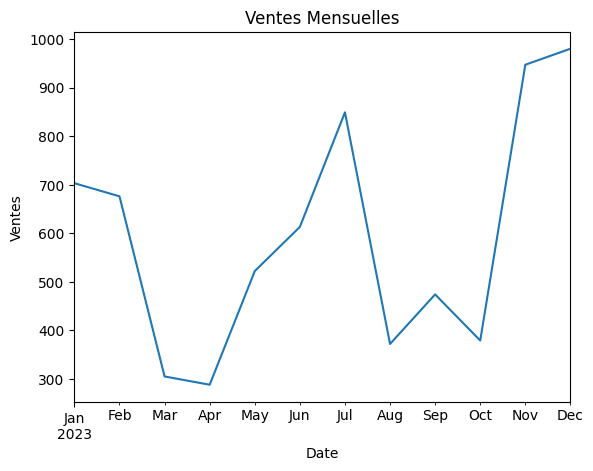

In [50]:
# Étape 3 : Rééchantillonnage mensuel (déjà mensuel dans cet exemple)
df.set_index('Date', inplace=True)

# Tracé des ventes mensuelles
df['Ventes'].plot(kind='line')
plt.title("Ventes Mensuelles")
plt.ylabel("Ventes")
plt.show()

In [51]:
# Étape 4 : Calcul de la moyenne mobile sur une fenêtre de 3 mois
df['Moyenne_Mobile'] = df['Ventes'].rolling(window=3).mean()
print(df)

            Ventes  Moyenne_Mobile
Date                              
2023-01-31     703             NaN
2023-02-28     676             NaN
2023-03-31     305      561.333333
2023-04-30     288      423.000000
2023-05-31     522      371.666667
2023-06-30     613      474.333333
2023-07-31     849      661.333333
2023-08-31     372      611.333333
2023-09-30     474      565.000000
2023-10-31     379      408.333333
2023-11-30     947      600.000000
2023-12-31     980      768.666667


**Exercice 3 : Analyse Exploratoire**

* Chargez un fichier CSV contenant des données démographiques.
* Calculez les statistiques descriptives pour chaque colonne numérique.
* Identifiez les corrélations entre les différentes variables.
* Créez un graphique pour visualiser la distribution des âges.

In [54]:
import matplotlib.pyplot as plt

# Création de données synthétiques
data = {
    'Nom': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Âge': [24, 27, 22, 32, 29],
    'Revenu': [50000, 54000, 48000, 62000, 59000],
    'Ville': ['Paris', 'Lyon', 'Marseille', 'Lille', 'Bordeaux']
}

df = pd.DataFrame(data)
print(df)

       Nom  Âge  Revenu      Ville
0    Alice   24   50000      Paris
1      Bob   27   54000       Lyon
2  Charlie   22   48000  Marseille
3    David   32   62000      Lille
4      Eva   29   59000   Bordeaux


In [53]:
# Étape 2 : Calcul des statistiques descriptives
print("Statistiques descriptives :\n", df.describe())

Statistiques descriptives :
              Âge        Revenu
count   5.000000      5.000000
mean   26.800000  54600.000000
std     3.962323   5899.152482
min    22.000000  48000.000000
25%    24.000000  50000.000000
50%    27.000000  54000.000000
75%    29.000000  59000.000000
max    32.000000  62000.000000


In [55]:
# Étape 3 : Identification des corrélations
correlation_matrix = df[['Âge', 'Revenu']].corr()
print("Matrice de corrélation :\n", correlation_matrix)

Matrice de corrélation :
              Âge    Revenu
Âge     1.000000  0.990402
Revenu  0.990402  1.000000


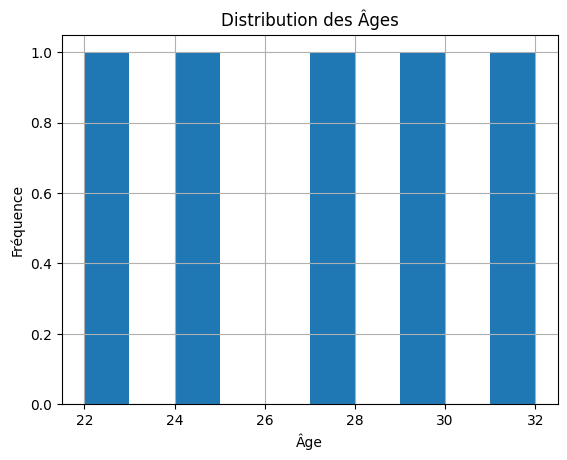

In [56]:
# Étape 4 : Visualisation de la distribution des âges
df['Âge'].hist()
plt.title("Distribution des Âges")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()